In [45]:
import os
import glob
import numpy as np
import tifffile as tiff

root_dir = "/Volumes/Backup Plus/306_analysis_results/Experiment"  # Change this to the actual root directory

# Folders to process inside the "results" folder
target_folders = ["labels", "expanded_labels", "20expanded_labels_assignment_map"]

# Loop through all subfolders (B, C, D)
for subfolder in os.listdir(root_dir):
    subfolder_path = os.path.join(root_dir, subfolder)
    
    # Loop through Image1, Image2, Image3
    for image_folder in ["Image1", "Image2", "Image3"]:
        image_path = os.path.join(subfolder_path, image_folder, "565", "results")

        # Check if results folder exists
        if os.path.exists(image_path):
            for folder in target_folders:
                folder_path = os.path.join(image_path, folder)

                if os.path.exists(folder_path):
                    # Find TIFF files that end with a number + .tif (like 001.tif, 002.tif, etc.)
                    tiff_files = sorted(glob.glob(os.path.join(folder_path, "*[0-9][0-9][0-9].tif")))

                    # Exclude output files that start with "stacked_" or "max_projection_"
                    tiff_files = [f for f in tiff_files if not os.path.basename(f).startswith(("stacked_", "max_projection_"))]

                    if not tiff_files:
                        print(f"Skipping {folder_path}, no valid TIFF files found.")
                        continue  # Skip processing if there are no valid files

                    # Clear the images list at the start of each folder iteration
                    images = []

                    for tiff_file in tiff_files:
                        # Read each image as uint16
                        img = tiff.imread(tiff_file).astype(np.uint16)
                        images.append(img)

                    if images:  # Ensure we only process if images were read
                        # Compute max projection
                        max_projection = np.max(np.stack(images, axis=0), axis=0)

                        # Define an output folder (prevents overwriting original TIFF files)
                        output_folder = os.path.join(folder_path, "processed")
                        os.makedirs(output_folder, exist_ok=True)

                        # Save stacked images
                        stack_filename = f"stacked_{folder}.tif"
                        stack_path = os.path.join(output_folder, stack_filename)
                        tiff.imwrite(stack_path, np.stack(images, axis=0), imagej=True)

                        # Save max projection
                        max_proj_filename = f"max_projection_{folder}.tif"
                        max_proj_path = os.path.join(output_folder, max_proj_filename)
                        tiff.imwrite(max_proj_path, max_projection, imagej=True)

                        print(f"Finished processing: {folder_path}")

                else:
                    print(f"Skipping {folder_path}, folder not found.")


Finished processing: /Volumes/Backup Plus/306_analysis_results/Experiment/0hr_Incision/Image1/565/results/labels
Finished processing: /Volumes/Backup Plus/306_analysis_results/Experiment/0hr_Incision/Image1/565/results/expanded_labels


ValueError: all input arrays must have the same shape

In [2]:
# Getting all assignment results in nucleiing 
import glob
import os
import numpy as np
def find_all_files (folder_path, file_name):
    # Define the folder to search in
    folder_path = path
    # Find all matching files
    matching_filenames = glob.glob(os.path.join(folder_path, '**', file_name), recursive=True)
    
    # Print the list of matching files
    for file in matching_filenames:
        print(file)
    return matching_filenames

In [64]:
path = "/Volumes/Backup Plus/314_analysis_results/Experiment/0hr_Amputation"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Amputation_0h = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Amputation_0h.append(cells)
intensity_in_nuclei = sorted(find_all_files (path, "concatenated_intensity_in_nuclei.npy"))
Amputation_0h_intensity = []
for i in range(len(intensity_in_nuclei)):
    
    cells = np.load(intensity_in_nuclei[i])
    cells = cells[cells > 0]
    Amputation_0h_intensity.append(cells)

/Volumes/Backup Plus/314_analysis_results/Experiment/0hr_Amputation/Image3/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/0hr_Amputation/Image3/565/results/concatenated_intensity_in_nuclei.npy


In [57]:
path = "/Volumes/Backup Plus/314_analysis_results/Experiment/0hr_Incision"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Incision_0h = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Incision_0h.append(cells)
intensity_in_nuclei = sorted(find_all_files (path, "concatenated_intensity_in_nuclei.npy"))
Incision_0h_intensity = []
for i in range(len(intensity_in_nuclei)):
    
    cells = np.load(intensity_in_nuclei[i])
    cells = cells[cells > 0]
    Incision_0h_intensity.append(cells)

/Volumes/Backup Plus/314_analysis_results/Experiment/0hr_Incision/Image1/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/0hr_Incision/Image1/565/results/concatenated_intensity_in_nuclei.npy


In [48]:
path = "/Volumes/Backup Plus/306_analysis_results/Experiment/6hr_Incision"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Incision_6h = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Incision_6h.append(cells)
intensity_in_nuclei = sorted(find_all_files (path, "concatenated_intensity_in_nuclei.npy"))
Incision_6h_intensity = []
for i in range(len(intensity_in_nuclei)):
    
    cells = np.load(intensity_in_nuclei[i])
    cells = cells[cells > 0]
    Incision_6h_intensity.append(cells)

/Volumes/Backup Plus/306_analysis_results/Experiment/6hr_Incision/Image1/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/306_analysis_results/Experiment/6hr_Incision/Image2/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/306_analysis_results/Experiment/6hr_Incision/Image3/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/306_analysis_results/Experiment/6hr_Incision/Image1/565/results/concatenated_intensity_in_nuclei.npy
/Volumes/Backup Plus/306_analysis_results/Experiment/6hr_Incision/Image2/565/results/concatenated_intensity_in_nuclei.npy
/Volumes/Backup Plus/306_analysis_results/Experiment/6hr_Incision/Image3/565/results/concatenated_intensity_in_nuclei.npy


In [58]:
path = "/Volumes/Backup Plus/314_analysis_results/Experiment/6hr_Amputation"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Amputation_6h = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Amputation_6h.append(cells)
intensity_in_nuclei = sorted(find_all_files (path, "concatenated_intensity_in_nuclei.npy"))
Amputation_6h_intensity = []
for i in range(len(intensity_in_nuclei)):
    
    cells = np.load(intensity_in_nuclei[i])
    cells = cells[cells > 0]
    Amputation_6h_intensity.append(cells)

/Volumes/Backup Plus/314_analysis_results/Experiment/6hr_Amputation/Image2/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/6hr_Amputation/Image3/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/6hr_Amputation/Image2/565/results/concatenated_intensity_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/6hr_Amputation/Image3/565/results/concatenated_intensity_in_nuclei.npy


In [59]:
path = "/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Amputation"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Amputation_12h = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Amputation_12h.append(cells)
intensity_in_nuclei = sorted(find_all_files (path, "concatenated_intensity_in_nuclei.npy"))
Amputation_12h_intensity = []
for i in range(len(intensity_in_nuclei)):
    
    cells = np.load(intensity_in_nuclei[i])
    cells = cells[cells > 0]
    Amputation_12h_intensity.append(cells)

/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Amputation/Image2/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Amputation/Image1/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Amputation/Image2/565/results/concatenated_intensity_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Amputation/Image1/565/results/concatenated_intensity_in_nuclei.npy


In [60]:
path = "/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Incision"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Incision_12h = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Incision_12h.append(cells)
intensity_in_nuclei = sorted(find_all_files (path, "concatenated_intensity_in_nuclei.npy"))
Incision_12h_intensity = []
for i in range(len(intensity_in_nuclei)):
    
    cells = np.load(intensity_in_nuclei[i])
    cells = cells[cells > 0]
    Incision_12h_intensity.append(cells)

/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Incision/Image1/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Incision/Image2/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Incision/Image3/565/results/concatenated_spot_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Incision/Image1/565/results/concatenated_intensity_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Incision/Image2/565/results/concatenated_intensity_in_nuclei.npy
/Volumes/Backup Plus/314_analysis_results/Experiment/12hr_Incision/Image3/565/results/concatenated_intensity_in_nuclei.npy


/Users/eliasguan/anaconda3/envs/stardist-env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/eliasguan/anaconda3/envs/stardist-env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation maximum which has no identity

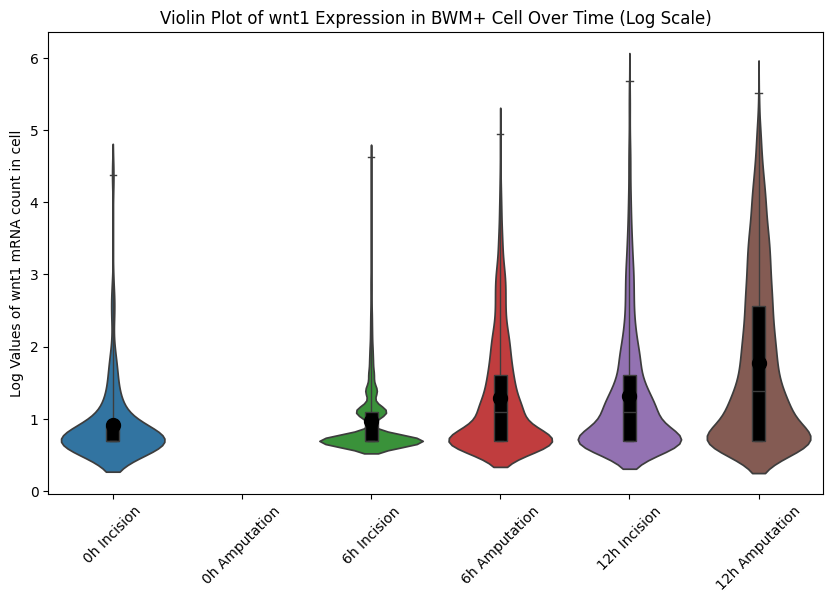

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Define the x-axis labels for each dataset
x_labels = ["0h Incision", '0h Amputation', '6h Incision', '6h Amputation', '12h Incision', '12h Amputation']

# Assuming your data arrays are already defined and concatenated
data_arrays = [np.concatenate(Incision_0h), np.concatenate(Amputation_0h), np.concatenate(Incision_6h),
               np.concatenate(Amputation_6h), np.concatenate(Incision_12h), np.concatenate(Amputation_12h)]

# Apply log transformation if there are extreme values
log_data_arrays = [np.log1p(data) for data in data_arrays]  # log1p handles zero values

# Perform t-tests only for the specified pairs and store results
pairs = [
    (2, 3),  # Incision 6h vs Amputation 6h
    (3, 5)   # Amputation 6h vs Amputation 12h
]

results = {}
for i, j in pairs:
    t_stat, p_value = stats.ttest_ind(data_arrays[i], data_arrays[j], equal_var=False)
    results[f"{x_labels[i]} vs {x_labels[j]}"] = p_value  # Store only p-values for plotting

# Plot setup
fig = plt.figure(figsize=(10, 6))

# Create violin plot
sns.violinplot(data=log_data_arrays, inner=None)

# Overlay the mean values using scatter directly on the violin plot
means = [np.mean(data) for data in log_data_arrays]
plt.scatter(x=np.arange(len(x_labels)), y=means, color='black', s=100, label='Means', zorder=5)  # Black points for means

# Add boxplot overlay
sns.boxplot(data=log_data_arrays, whis=np.inf, color='k', width=0.1)

# Customize the x-axis
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)

# Add labels and title
plt.title('Violin Plot of wnt1 Expression in BWM+ Cell Over Time (Log Scale)')
plt.ylabel('Log Values of wnt1 mRNA count in cell')

# Add t-test annotations for the specific comparisons
y_max = np.max([np.max(data) for data in log_data_arrays])  # Get the maximum y value for positioning
y_offset = 0.5  # Base offset for annotations
increment = 0.25  # Increment to space out p-values

for index, (key, p_value) in enumerate(results.items()):
    x1, x2 = pairs[index]  # Get the indices for the datasets being compared
    y_pos = y_max + y_offset + (increment * index)  # Adjust vertical position based on index

    # Calculate the average position between the two datasets for line placement
    avg_pos = (x1 + x2) / 2   # Center between the x-coordinates of the two datasets

    # Center the line between the two datasets
    plt.plot([x1 , x2], [y_pos, y_pos], color='k', linewidth=2)  # Centered line
    plt.text(avg_pos, y_pos + 0.10, f"p = {p_value:.5f}", ha='center')  # Add p-value text at average position

# Annotate mean values on the plot in the middle of the whole figure
mean_y_position = np.mean(means)  # Calculate the mean of the mean values for positioning
for i, mean in enumerate(means):
    plt.text(i, -0.05, f"{mean:.2f}", ha='center', color='black', fontsize=10)  # Annotate means

# Show plot with tight layout
plt.tight_layout()
plt.legend()
plt.show()
fig.savefig("incisionAmputationPlot.png")

/Users/eliasguan/anaconda3/envs/stardist-env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/eliasguan/anaconda3/envs/stardist-env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation maximum which has no identity

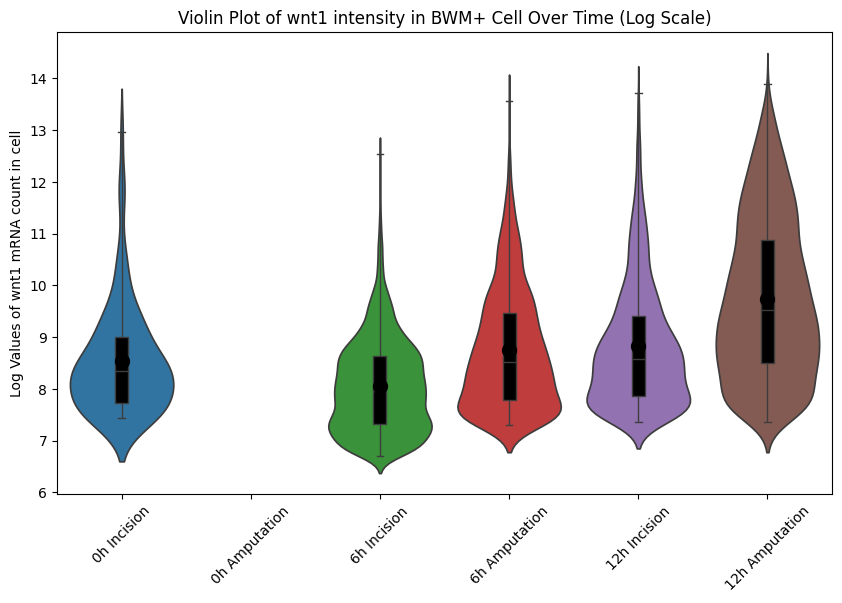

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Define the x-axis labels for each dataset
x_labels = ["0h Incision", '0h Amputation', '6h Incision', '6h Amputation', '12h Incision', '12h Amputation']

# Assuming your data arrays are already defined and concatenated
data_arrays = [np.concatenate(Incision_0h_intensity), np.concatenate(Amputation_0h_intensity), np.concatenate(Incision_6h_intensity),
               np.concatenate(Amputation_6h_intensity), np.concatenate(Incision_12h_intensity), np.concatenate(Amputation_12h_intensity)]

# Apply log transformation if there are extreme values
log_data_arrays = [np.log1p(data) for data in data_arrays]  # log1p handles zero values

# Perform t-tests only for the specified pairs and store results
pairs = [
    (2, 3),  # Incision 6h vs Amputation 6h
    (3, 5)   # Amputation 6h vs Amputation 12h
]

results = {}
for i, j in pairs:
    t_stat, p_value = stats.ttest_ind(data_arrays[i], data_arrays[j], equal_var=False)
    results[f"{x_labels[i]} vs {x_labels[j]}"] = p_value  # Store only p-values for plotting

# Plot setup
fig = plt.figure(figsize=(10, 6))

# Create violin plot
sns.violinplot(data=log_data_arrays, inner=None)

# Overlay the mean values using scatter directly on the violin plot
means = [np.mean(data) for data in log_data_arrays]
plt.scatter(x=np.arange(len(x_labels)), y=means, color='black', s=100, label='Means', zorder=5)  # Black points for means

# Add boxplot overlay
sns.boxplot(data=log_data_arrays, whis=np.inf, color='k', width=0.1)

# Customize the x-axis
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)

# Add labels and title
plt.title('Violin Plot of wnt1 intensity in BWM+ Cell Over Time (Log Scale)')
plt.ylabel('Log Values of wnt1 mRNA count in cell')

# Add t-test annotations for the specific comparisons
y_max = np.max([np.max(data) for data in log_data_arrays])  # Get the maximum y value for positioning
y_offset = 0.5  # Base offset for annotations
increment = 0.25  # Increment to space out p-values

for index, (key, p_value) in enumerate(results.items()):
    x1, x2 = pairs[index]  # Get the indices for the datasets being compared
    y_pos = y_max + y_offset + (increment * index)  # Adjust vertical position based on index

    # Calculate the average position between the two datasets for line placement
    avg_pos = (x1 + x2) / 2   # Center between the x-coordinates of the two datasets

    # Center the line between the two datasets
    plt.plot([x1 , x2], [y_pos, y_pos], color='k', linewidth=2)  # Centered line
    plt.text(avg_pos, y_pos + 0.10, f"p = {p_value:.5f}", ha='center')  # Add p-value text at average position

# Annotate mean values on the plot in the middle of the whole figure
mean_y_position = np.mean(means)  # Calculate the mean of the mean values for positioning
for i, mean in enumerate(means):
    plt.text(i, -0.05, f"{mean:.2f}", ha='center', color='black', fontsize=10)  # Annotate means

# Show plot with tight layout
plt.tight_layout()
plt.legend()
plt.show()
fig.savefig("incisionAmputationPlot.png")

In [46]:
import os
import pandas as pd
os.chdir('/Users/eliasguan/Downloads')

In [23]:
data_dict = {
    "Incision_0h": Incision_0h,
    "Amputation_0h": Amputation_0h,
    "Incision_6h": Incision_6h,
    "Amputation_6h": Amputation_6h,
    "Incision_12h": Incision_12h,
    "Amputation_12h": Amputation_12h
}

# Create a dictionary to store columns
csv_data = {}

# Iterate over each condition and store separately
for key, arrays in data_dict.items():
    for i, arr in enumerate(arrays, start=1):
        csv_data[f"{key}_{i}"] = arr  # Unique column name

# Convert to DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in csv_data.items()]))

# Save to CSV
df.to_csv("314_output.csv", index=False)

print("CSV file saved as output.csv!")

CSV file saved as output.csv!


In [51]:
data_dict = {
    "Incision_0h": Incision_0h_intensity,
    "Amputation_0h": Amputation_0h_intensity,
    "Incision_6h": Incision_6h_intensity,
    "Amputation_6h": Amputation_6h_intensity,
    "Incision_12h": Incision_12h_intensity,
    "Amputation_12h": Amputation_12h_intensity
}

# Create a dictionary to store columns
csv_data = {}

# Iterate over each condition and store separately
for key, arrays in data_dict.items():
    for i, arr in enumerate(arrays, start=1):
        csv_data[f"{key}_{i}"] = arr  # Unique column name

# Convert to DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in csv_data.items()]))

# Save to CSV
df.to_csv("306_output_intensity.csv", index=False)

print("CSV file saved as output.csv!")

CSV file saved as output.csv!


/var/folders/s2/hm4xyqwd26xgwmf3znp5sffr0000gn/T/ipykernel_53689/348241658.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Value", data=df_long, showfliers=False, palette=palette)


ValueError: The number of FixedLocator locations (18), usually from a call to set_ticks, does not match the number of labels (6).

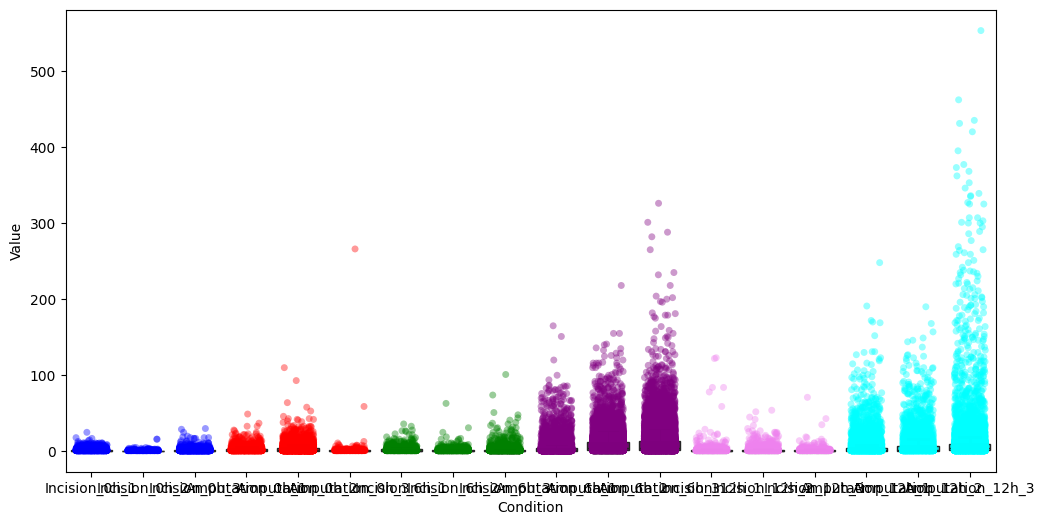

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("306_output.csv")

# Convert to long format for seaborn
df_long = df.melt(var_name="Condition", value_name="Value")

palette = {
    'Incision_0h_1': 'blue',
    'Incision_0h_2': 'blue',
    'Incision_0h_3': 'blue',
    'Amputation_0h_1': 'red',
    'Amputation_0h_2': 'red',
    'Amputation_0h_3': 'red',
    'Incision_6h_1': 'green',
    'Incision_6h_3': "green",
    'Incision_6h_2': "green",
    'Amputation_6h_1': 'purple',
    'Amputation_6h_2': 'purple',
    'Amputation_6h_3': 'purple',
    'Incision_12h_1': 'violet',
    'Amputation_12h_1': 'cyan',
    'Amputation_12h_2': 'cyan',
    'Amputation_12h_3': 'cyan',
    'Incision_12h_2': 'violet',
    'Incision_12h_3': 'violet',
    'Amputation_12h': 'cyan', 
    'Amputation_6h' :'purple',
    'Incision_12h' :'violet',
    'Incision_6h' :'green',
    'Incision_0h' :'blue',
    'Amputation_0h':'red'
}
df_long['Group'] = df_long['Condition'].str.extract(r'([A-Za-z]+_\d+h)')[0]



plt.figure(figsize=(12, 6))

# Boxplot without grouping (keep individual conditions)
sns.boxplot(x="Condition", y="Value", data=df_long, showfliers=False, palette=palette)

# Jittered points with transparency and custom colors for each condition
sns.stripplot(x="Condition", y="Value", data=df_long, jitter=0.3, size=5, alpha=0.4, 
              hue="Condition", palette=palette, dodge=False, marker="o")

# Custom X-axis labels (show broader group names)
labels = df_long['Group'].unique()  # Get unique group names
plt.xticks(ticks=range(len(df_long['Condition'].unique())), labels=labels, rotation=45)

# Adjustments
plt.title("Jittered Box Plot of Conditions")
plt.xlabel("Condition")
plt.ylabel("Value")

# Show the plot
plt.show()


/var/folders/s2/hm4xyqwd26xgwmf3znp5sffr0000gn/T/ipykernel_53689/3032764858.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Value", data=df_long, showfliers=False, palette=palette)


ValueError: The number of FixedLocator locations (18), usually from a call to set_ticks, does not match the number of labels (6).

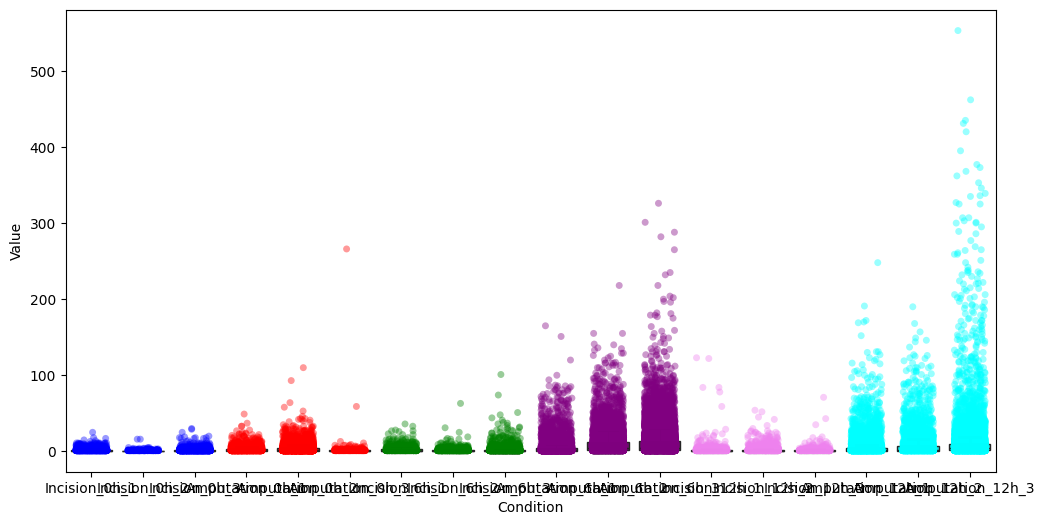

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("306_output.csv")

# Convert to long format for seaborn
df_long = df.melt(var_name="Condition", value_name="Value")

# Extract general group name (e.g., "Incision_0h", "Amputation_12h")
df_long['Group'] = df_long['Condition'].str.extract(r'([A-Za-z]+_\d+h)')[0]

# Dictionary to rename groups
rename_map = {
    'Incision_0h': 'Incision_0h_intensity',
    'Incision_6h': 'Incision_6h_intensity',
    'Incision_12h': 'Incision_12h_intensity',
    'Amputation_0h': 'Amputation_0h_intensity',
    'Amputation_6h': 'Amputation_6h_intensity',
    'Amputation_12h': 'Amputation_12h_intensity'
}

# Apply mapping to rename groups
df_long['Group'] = df_long['Group'].map(rename_map)

# Define custom palette
palette = {
    'Incision_0h_1': 'blue', 'Incision_0h_2': 'blue', 'Incision_0h_3': 'blue',
    'Amputation_0h_1': 'red', 'Amputation_0h_2': 'red', 'Amputation_0h_3': 'red',
    'Incision_6h_1': 'green', 'Incision_6h_2': 'green', 'Incision_6h_3': 'green',
    'Amputation_6h_1': 'purple', 'Amputation_6h_2': 'purple', 'Amputation_6h_3': 'purple',
    'Incision_12h_1': 'violet', 'Incision_12h_2': 'violet', 'Incision_12h_3': 'violet',
    'Amputation_12h_1': 'cyan', 'Amputation_12h_2': 'cyan', 'Amputation_12h_3': 'cyan',
    'Amputation_12h': 'cyan', 'Amputation_6h': 'purple', 'Incision_12h': 'violet',
    'Incision_6h': 'green', 'Incision_0h': 'blue', 'Amputation_0h': 'red'
}

plt.figure(figsize=(12, 6))

# Boxplot without grouping (keep individual conditions)
sns.boxplot(x="Condition", y="Value", data=df_long, showfliers=False, palette=palette)

# Jittered points with transparency and custom colors for each condition
sns.stripplot(x="Condition", y="Value", data=df_long, jitter=0.3, size=5, alpha=0.4, 
              hue="Condition", palette=palette, dodge=False, marker="o")

# Custom X-axis labels (show broader group names)
labels = df_long['Group'].unique()  # Get unique group names
plt.xticks(ticks=range(len(df_long['Condition'].unique())), labels=labels, rotation=45)

# Adjustments
plt.title("Jittered Box Plot of Conditions")
plt.xlabel("Condition")
plt.ylabel("Value")

# Show the plot
plt.show()


In [270]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Amputation"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Amputation_0h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Amputation_0h_nuclei.append(cells)



/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Amputation/Image1/565/results/concatenated_spot_in_nuclei.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Amputation/Image2/565/results/concatenated_spot_in_nuclei.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Amputation/Image3/565/results/concatenated_spot_in_nuclei.npy


In [271]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Incision"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Incision_0h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Incision_0h_nuclei.append(cells)

/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Incision/Image1/565/results/concatenated_spot_in_nuclei.npy


In [272]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Amputation"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Amputation_6h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Amputation_6h_nuclei.append(cells)

/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Amputation/Image1/565/results/concatenated_spot_in_nuclei.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Amputation/Image2/565/results/concatenated_spot_in_nuclei.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Amputation/Image3/565/results/concatenated_spot_in_nuclei.npy


In [273]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Incision"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Incision_6h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Incision_6h_nuclei.append(cells)

/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Incision/Image1/565/results/concatenated_spot_in_nuclei.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Incision/Image2/565/results/concatenated_spot_in_nuclei.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Incision/Image3/565/results/concatenated_spot_in_nuclei.npy


In [274]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Amputation"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Amputation_12h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Amputation_12h_nuclei.append(cells)

/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Amputation/Image1/565/results/concatenated_spot_in_nuclei.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Amputation/Image2/565/results/concatenated_spot_in_nuclei.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Amputation/Image3/565/results/concatenated_spot_in_nuclei.npy


In [275]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Incision"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
Incision_12h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    Incision_12h_nuclei.append(cells)

/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Incision/Image1/565/results/concatenated_spot_in_nuclei.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Incision/Image2/565/results/concatenated_spot_in_nuclei.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Incision/Image3/565/results/concatenated_spot_in_nuclei.npy


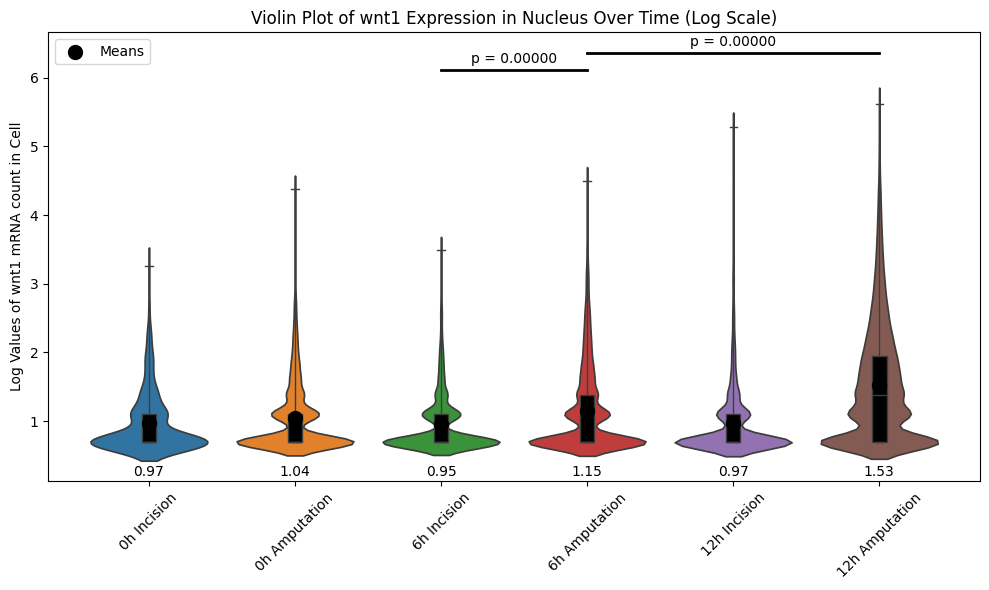

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Define the x-axis labels for each dataset
x_labels = ["0h Incision", '0h Amputation', '6h Incision', '6h Amputation', '12h Incision', '12h Amputation']

# Assuming your data arrays are already defined and concatenated
data_arrays = [np.concatenate(Incision_0h_nuclei), np.concatenate(Amputation_0h_nuclei), np.concatenate(Incision_6h_nuclei),
               np.concatenate(Amputation_6h_nuclei), np.concatenate(Incision_12h_nuclei), np.concatenate(Amputation_12h_nuclei)]

# Apply log transformation if there are extreme values
log_data_arrays = [np.log1p(data) for data in data_arrays]  # log1p handles zero values

# Perform t-tests only for the specified pairs and store results
pairs = [
    (2, 3),  # Incision 6h vs Amputation 6h
    (3, 5)   # Amputation 6h vs Amputation 12h
]

results = {}
for i, j in pairs:
    t_stat, p_value = stats.ttest_ind(data_arrays[i], data_arrays[j], equal_var=False)
    results[f"{x_labels[i]} vs {x_labels[j]}"] = p_value  # Store only p-values for plotting

# Plot setup
fig = plt.figure(figsize=(10, 6))

# Create violin plot
sns.violinplot(data=log_data_arrays, inner=None)

# Overlay the mean values using scatter directly on the violin plot
means = [np.mean(data) for data in log_data_arrays]
plt.scatter(x=np.arange(len(x_labels)), y=means, color='black', s=100, label='Means', zorder=5)  # Black points for means

# Add boxplot overlay
sns.boxplot(data=log_data_arrays, whis=np.inf, color='k', width=0.1)

# Customize the x-axis
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)

# Add labels and title
plt.title('Violin Plot of wnt1 Expression in Nucleus Over Time (Log Scale)')
plt.ylabel('Log Values of wnt1 mRNA count in Cell')

# Add t-test annotations for the specific comparisons
y_max = np.max([np.max(data) for data in log_data_arrays])  # Get the maximum y value for positioning
y_offset = 0.5  # Base offset for annotations
increment = 0.25  # Increment to space out p-values

for index, (key, p_value) in enumerate(results.items()):
    x1, x2 = pairs[index]  # Get the indices for the datasets being compared
    y_pos = y_max + y_offset + (increment * index)  # Adjust vertical position based on index

    # Calculate the average position between the two datasets for line placement
    avg_pos = (x1 + x2) / 2   # Center between the x-coordinates of the two datasets

    # Center the line between the two datasets
    plt.plot([x1 , x2], [y_pos, y_pos], color='k', linewidth=2)  # Centered line
    plt.text(avg_pos, y_pos + 0.10, f"p = {p_value:.5f}", ha='center')  # Add p-value text at average position

# Annotate mean values on the plot in the middle of the whole figure
mean_y_position = np.mean(means)  # Calculate the mean of the mean values for positioning
for i, mean in enumerate(means):
    plt.text(i, 0.2, f"{mean:.2f}", ha='center', color='black', fontsize=10)  # Annotate means

# Show plot with tight layout
plt.tight_layout()
plt.legend()
plt.show()
fig.savefig("incisionAmputationPlot_in_nuclei.png")

In [277]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Amputation"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_counterstain.npy"))
counterstain_Amputation_0h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    counterstain_Amputation_0h_nuclei.append(cells)


/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Amputation/Image1/633/results/concatenated_spot_counterstain.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Amputation/Image2/633/results/concatenated_spot_counterstain.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Amputation/Image3/633/results/concatenated_spot_counterstain.npy


In [278]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Incision"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_counterstain.npy"))
counterstain_Incision_0h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    counterstain_Incision_0h_nuclei.append(cells)


/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/0h_Incision/Image1/633/results/concatenated_spot_counterstain.npy


In [279]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Amputation"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_counterstain.npy"))
counterstain_Amputation_6h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    counterstain_Amputation_6h_nuclei.append(cells)

/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Amputation/Image1/633/results/concatenated_spot_counterstain.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Amputation/Image2/633/results/concatenated_spot_counterstain.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Amputation/Image3/633/results/concatenated_spot_counterstain.npy


In [280]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Incision"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_counterstain.npy"))
counterstain_Incision_6h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    counterstain_Incision_6h_nuclei.append(cells)

/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Incision/Image1/633/results/concatenated_spot_counterstain.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Incision/Image2/633/results/concatenated_spot_counterstain.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/6h_Incision/Image3/633/results/concatenated_spot_counterstain.npy


In [281]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Amputation"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_counterstain.npy"))
counterstain_Amputation_12h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    counterstain_Amputation_12h_nuclei.append(cells)

/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Amputation/Image1/633/results/concatenated_spot_counterstain.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Amputation/Image2/633/results/concatenated_spot_counterstain.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Amputation/Image3/633/results/concatenated_spot_counterstain.npy


In [282]:
path = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Incision"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_counterstain.npy"))
counterstain_Incision_12h_nuclei = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    counterstain_Incision_12h_nuclei.append(cells)

/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Incision/Image1/633/results/concatenated_spot_counterstain.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Incision/Image2/633/results/concatenated_spot_counterstain.npy
/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment/12h_Incision/Image3/633/results/concatenated_spot_counterstain.npy


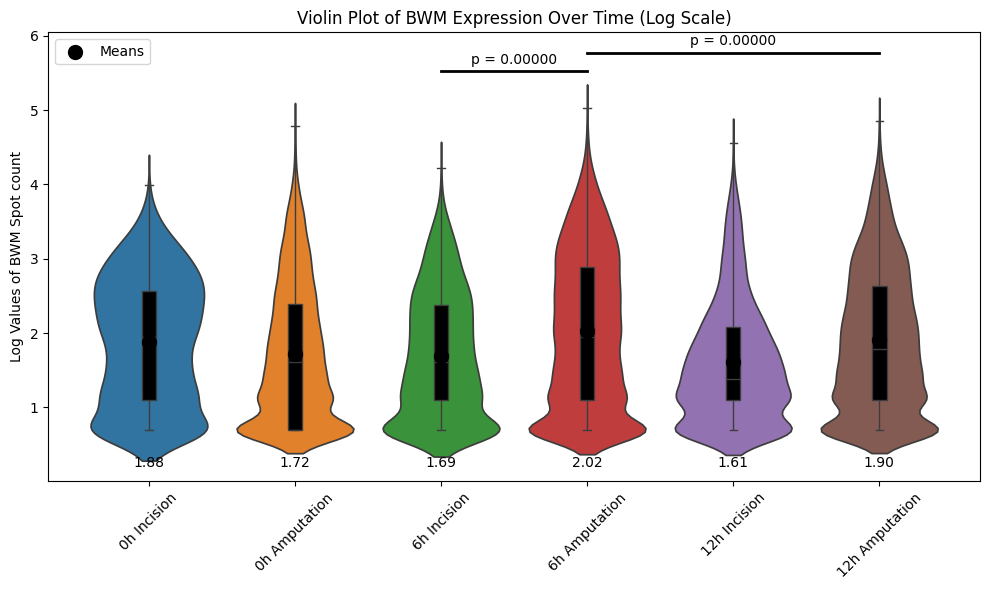

In [289]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Define the x-axis labels for each dataset
x_labels = ["0h Incision", '0h Amputation', '6h Incision', '6h Amputation', '12h Incision', '12h Amputation']

# Assuming your data arrays are already defined and concatenated
data_arrays = [np.concatenate(counterstain_Incision_0h_nuclei), np.concatenate(counterstain_Amputation_0h_nuclei), np.concatenate(counterstain_Incision_6h_nuclei),
               np.concatenate(counterstain_Amputation_6h_nuclei), np.concatenate(counterstain_Incision_12h_nuclei), np.concatenate(counterstain_Amputation_12h_nuclei)]

# Apply log transformation if there are extreme values
log_data_arrays = [np.log1p(data) for data in data_arrays]  # log1p handles zero values

# Perform t-tests only for the specified pairs and store results
pairs = [
    (2, 3),  # Incision 6h vs Amputation 6h
    (3, 5)   # Amputation 6h vs Amputation 12h
]

results = {}
for i, j in pairs:
    t_stat, p_value = stats.ttest_ind(data_arrays[i], data_arrays[j], equal_var=False)
    results[f"{x_labels[i]} vs {x_labels[j]}"] = p_value  # Store only p-values for plotting

# Plot setup
fig = plt.figure(figsize=(10, 6))

# Create violin plot
sns.violinplot(data=log_data_arrays, inner=None)

# Overlay the mean values using scatter directly on the violin plot
means = [np.mean(data) for data in log_data_arrays]
plt.scatter(x=np.arange(len(x_labels)), y=means, color='black', s=100, label='Means', zorder=5)  # Black points for means

# Add boxplot overlay
sns.boxplot(data=log_data_arrays, whis=np.inf, color='k', width=0.1)

# Customize the x-axis
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)

# Add labels and title
plt.title('Violin Plot of BWM Expression Over Time (Log Scale)')
plt.ylabel('Log Values of BWM Spot count')

# Add t-test annotations for the specific comparisons
y_max = np.max([np.max(data) for data in log_data_arrays])  # Get the maximum y value for positioning
y_offset = 0.5  # Base offset for annotations
increment = 0.25  # Increment to space out p-values

for index, (key, p_value) in enumerate(results.items()):
    x1, x2 = pairs[index]  # Get the indices for the datasets being compared
    y_pos = y_max + y_offset + (increment * index)  # Adjust vertical position based on index

    # Calculate the average position between the two datasets for line placement
    avg_pos = (x1 + x2) / 2   # Center between the x-coordinates of the two datasets

    # Center the line between the two datasets
    plt.plot([x1 , x2], [y_pos, y_pos], color='k', linewidth=2)  # Centered line
    plt.text(avg_pos, y_pos + 0.10, f"p = {p_value:.5f}", ha='center')  # Add p-value text at average position

# Annotate mean values on the plot in the middle of the whole figure
mean_y_position = np.mean(means)  # Calculate the mean of the mean values for positioning
for i, mean in enumerate(means):
    plt.text(i, 0.2, f"{mean:.2f}", ha='center', color='black', fontsize=10)  # Annotate means

# Show plot with tight layout
plt.tight_layout()
plt.legend()
plt.show()
fig.savefig("BWMPlot_in_nuclei.png")

In [65]:
filepath = "/Users/eliasguan/Desktop/EG_GRC_Poster/Lab Meeting Presentation and Progress/Report To Chris 103024/Example Image/Nuclei_labesl.tif"

In [68]:
import tifffile
nuclei = tifffile.imread(filepath)
os.chdir(os.path.dirname(filepath))

In [76]:
from skimage import segmentation
expanded = segmentation.expand_labels(nuclei,20)

In [77]:
tifffile.imwrite("expanded_example_nuclei.tif", expanded, photometric = "minisblack")

In [74]:
os.getcwd()

'/Users/eliasguan/Desktop/EG_GRC_Poster/Lab Meeting Presentation and Progress/Report To Chris 103024/Example Image'